# Setup

In [4]:
import sys
sys.path.append("..")
from PDESystem import *
from PDESubsystem import *
from pdeforms import *

%load_ext autoreload
%autoreload 2

class pde_solver(PDESystem):
    def __init__(self, comp, mesh, parameters):
        PDESystem.__init__(self, comp, mesh, parameters)

    def setup_bcs(self):
        x, y = fd.SpatialCoordinate(self.mesh)
        T0 = fd.exp(x*y*self.t)
        
        bc = fd.DirichletBC(self.V['T'], T0, 'on_boundary')

        self.bc['T'] = [[bc, T0, 'on_boundary', 0, 'update']]
        
    def setup_constants(self):
        x, y = fd.SpatialCoordinate(self.mesh)
        self.constants = {
            'k' : fd.Constant(self.prm['dt']),
            'source' : x*y - (y*self.t)**2 - (x*self.t)**2,
            'eps' : fd.Constant(1),
        }


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Solve

In [9]:
solver_parameters = recursive_update(solver_parameters,
{
'space': {'T': fd.FunctionSpace},
'degree': {'T': 1},
'type': {'T': 'gmres'},
'subsystem_class' : {'T' : temp_poisson},
'precond': {'T': 'sor', 'p' : 'sor'},
'dt' : 0.1,
 'T' : 1.0 }                         
)

mesh = fd.UnitSquareMesh(3, 3)
solver = pde_solver([['T']], mesh, solver_parameters)
solver.setup_constants()
solver.define(['T'], 'T')
solver.setup_bcs()
x, y = fd.SpatialCoordinate(mesh)
T0 = fd.exp(x*y*solver.t)
solver.setup_initial('T_n', T0)
solver.solve(time_update=True)

UFL:WARNING Form has no parts with arity 2.


<class 'pdeforms.temp_poisson'>
[None]
['T']
T 0
updated boundaries for T
updated boundaries for T
updated boundaries for T
updated boundaries for T
updated boundaries for T
updated boundaries for T
updated boundaries for T
updated boundaries for T
updated boundaries for T
updated boundaries for T
time = 1.000
updated boundaries for T


# Plotting

(-0.05, 1.05, -0.05, 1.05)

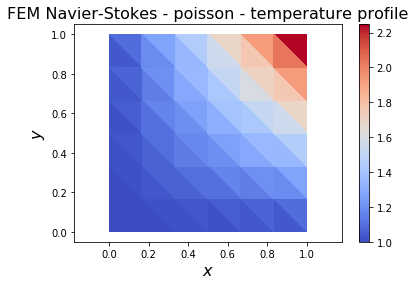

In [6]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - poisson - temperature profile', fontsize=16)
fd.plot(solver.form_args['T_n'],axes=ax1)
ax1.axis('equal')